In [174]:
from datetime import date, datetime, timedelta


import pandas as pd
import numpy as np

from loguru import logger
import pycountry

from matplotlib.pylab import plt
%matplotlib inline

!pwd

/home/barry/projects/covid_projects/fatality_analysis


# Load OWID Base Dataset 

In [189]:
df = pd.read_pickle('../generating_covid_datasets/data/base_owid.pkl')
df.shape, df.date.max()

((38695, 10), Timestamp('2020-08-25 00:00:00'))

# Cases vs Prevalence
The 14 day case totals are effectively an estimate of *prevalence*, assuming a 14 day infectous period.

In [191]:
infectous_period = 14  # Number of days someone remains infectous

df = df.set_index(['country', 'date']).join(df.groupby('country').apply(
    lambda g: g.set_index('date')[['new_cases']].shift(infectous_period)).rename(columns={'new_cases': 'new_recovered'})).reset_index()

df = df.set_index(['country', 'date']).join(df.groupby('country').apply(
    lambda g: g.set_index('date')[['new_cases']].cumsum()).rename(columns={'new_cases': 'cum_cases'})).reset_index()

df = df.set_index(['country', 'date']).join(df.groupby('country').apply(
    lambda g: g.set_index('date')[['new_recovered']].cumsum()).rename(columns={'new_recovered': 'cum_recovered'})).reset_index()


df.shape

(38695, 13)

In [206]:
df['curr_cases'] = df['cum_cases']-df['cum_recovered']
df['curr_cases_per_100k'] = 100000*df['curr_cases']/df['population']

df['new_cases_per_100k'] = 100000*df['new_cases']/df['population']

(211.57212651150434,
 2.632753560495411,
 27.29962922729088,
 7.750000000000001,
 10.36923076923077)

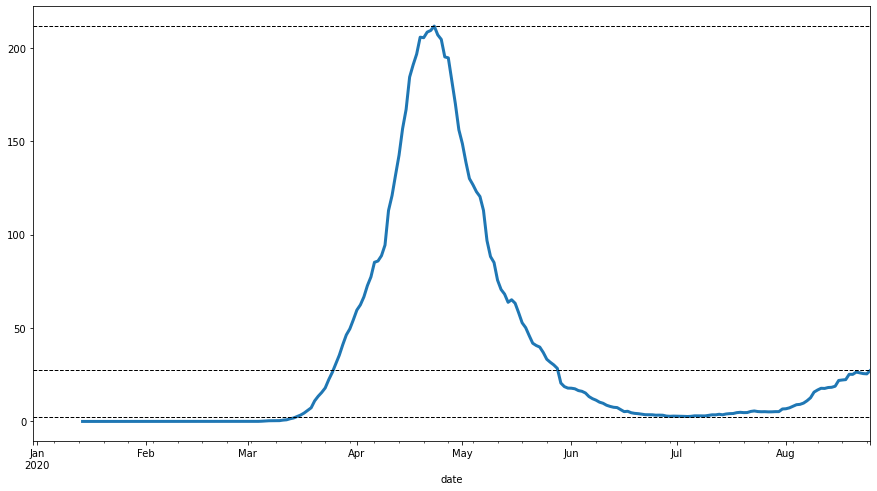

In [229]:
fig, ax = plt.subplots(figsize=(15, 8))

ireland = df[df['country']=='Ireland'].set_index('date')
# ireland['new_cases'].rolling('7d').mean().plot(ax=ax)

ireland['curr_cases_per_100k'].plot(ax=ax, lw=3)

peak_date = ireland['curr_cases_per_100k'].idxmax()
peak_level = ireland['curr_cases_per_100k'].max()
ax.axhline(peak_level, c='k', ls='--', lw=1)


curr_level = ireland['curr_cases_per_100k'].iloc[-1]
ax.axhline(curr_level, c='k', ls='--', lw=1)

min_level = ireland.loc[peak_date:]['curr_cases_per_100k'].min()
ax.axhline(min_level, c='k', ls='--', lw=1)




peak_level, min_level, curr_level, peak_level/curr_level, curr_level/min_level

In [194]:
ireland['new_cases'].shift(-14)

date
2019-12-31    0.0
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
             ... 
2020-08-21    NaN
2020-08-22    NaN
2020-08-23    NaN
2020-08-24    NaN
2020-08-25    NaN
Name: new_cases, Length: 239, dtype: float64

In [173]:
ireland.iloc[80:].head(25)

,country,country_code,country_id,continent,region,new_cases,new_deaths,new_tests,population,new_recovered,cum_cases,curr_cases
date,,,,,,,,,,,,
2020-03-20,Ireland,IRL,IE,Europe,eu,191.0,1.0,1469.0,4937796.0,7.0,557.0,550.0
2020-03-21,Ireland,IRL,IE,Europe,eu,126.0,0.0,1564.0,4937796.0,5.0,683.0,678.0
2020-03-22,Ireland,IRL,IE,Europe,eu,102.0,0.0,978.0,4937796.0,1.0,785.0,784.0
2020-03-23,Ireland,IRL,IE,Europe,eu,121.0,1.0,2581.0,4937796.0,2.0,906.0,904.0
2020-03-24,Ireland,IRL,IE,Europe,eu,219.0,2.0,1566.0,4937796.0,0.0,1125.0,1125.0
2020-03-25,Ireland,IRL,IE,Europe,eu,204.0,1.0,1775.0,4937796.0,14.0,1329.0,1315.0
2020-03-26,Ireland,IRL,IE,Europe,eu,235.0,2.0,3376.0,4937796.0,8.0,1564.0,1556.0
2020-03-27,Ireland,IRL,IE,Europe,eu,255.0,10.0,2941.0,4937796.0,27.0,1819.0,1792.0
2020-03-28,Ireland,IRL,IE,Europe,eu,302.0,3.0,2206.0,4937796.0,21.0,2121.0,2100.0


In [114]:
from_date = datetime(2020, 3, 1)
to_date = datetime(2020, 6, 1)

corrs = []

countries = ['Ireland', 'United Kingdom', 'France', 'Italy', 'Spain', 'Denmark', 'Sweden']

for country in countries:
    
    country_df = df[df['country']==country].set_index('date')
    
    for shift in range(0, 28):
        

        rolling_cases = country_df.loc[from_date: ]['new_cases'].rolling('7d').mean()
        rolling_deaths = country_df.loc[from_date: ]['new_deaths'].rolling('7d').mean().shift(-shift)

        corrs.append((country, shift, np.corrcoef(rolling_cases.loc[: to_date], rolling_deaths.loc[: to_date])[0, 1]))
    
corr_df = pd.DataFrame(corrs, columns=['country', 'lag', 'corr'])

corr_df

,country,lag,corr
0,Ireland,0,0.769834
1,Ireland,1,0.809685
2,Ireland,2,0.845420
3,Ireland,3,0.867850
4,Ireland,4,0.888687
...,...,...,...
191,Sweden,23,0.176322
192,Sweden,24,0.100722
193,Sweden,25,0.024126
194,Sweden,26,-0.051803


Text(0, 0.5, 'Correlation Coefficient')

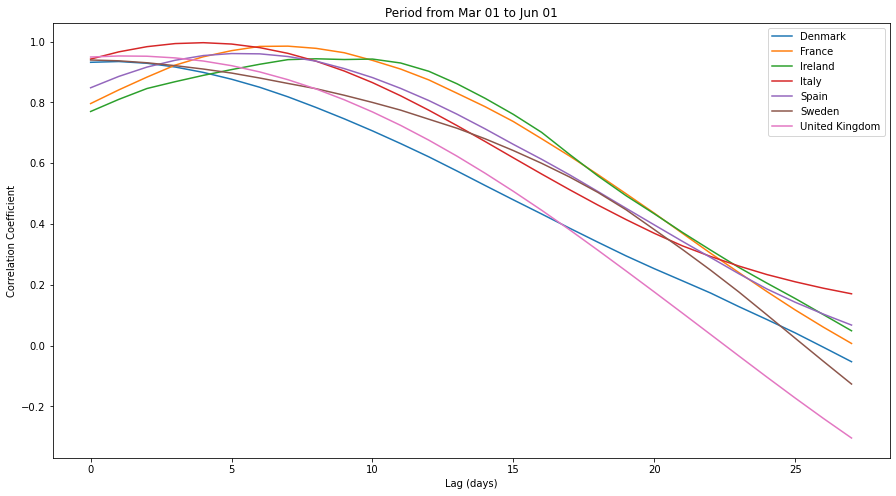

In [113]:
fig, ax = plt.subplots(figsize=(15, 8))

corr_df.groupby('country').apply(lambda g: g.set_index('lag')['corr'].plot(ax=ax))

ax.legend(list(corr_df.groupby('country').groups.keys()))


ax.set_title('Period from {} to {}'.format(datetime.strftime(from_date, '%b %d'), datetime.strftime(to_date, '%b %d')))
ax.set_xlabel('Lag (days)')
ax.set_ylabel('Correlation Coefficient')

In [83]:
list(corr_df.groupby('country').groups.keys())

['Denmark',
 'Finland',
 'France',
 'Ireland',
 'Italy',
 'Norway',
 'Portugal',
 'Spain',
 'Sweden',
 'United Kingdom']